# Constrained layout guide

How to use constrained-layout to fit plots within your figure cleanly.

* `constrained_layout`: it automatically adjusts subplots and decorations like legends and colorbars so that they fit in the figure window while still preserving, as best they can, the logical layout requested by the user.

* `constrained_layout`: it is similar to tight_layout, but uses a constraint solver to determine the size of axes that allows them to fit.

* `constrained_layout`: it needs to be activated before any axes are added to a figure. 

constrained_layout can be activated by two methods.
```ruby
plt.subplots(constrained_layout = True)

# another method is 
plt.rcParams['figure.constrained_layout.use'] = True
```

**Importing the required modules**

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import numpy as np

### Simple Example

In Matplotlib, the location of axes (including subplots) are specified in normalized figure coordinates. It can happen that your axis labels or titiles (or sometimes even ticklabels) go outside the figure area, and thus clipped.

In [17]:
# we will define a function to make figure and subplot so we dont
# have to rewrite the code agian

def draw_plot(axs, fontsize=12, labels=False):
    # creating a line on the axes
    ax.plot([i for i in range(10)], [i**3 for i in range(10)])

    # using ax.locatro_param() method
    ax.locator_params(nbins=10)
    # locator_params control behavior of major tick locators.
    # Because locator is involved in autoscalling, autoscale_view 
    # is called automatically after the parameters are changed.
    
    if labels:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    else:
        # setting the labels
        ax.set_xlabel('x-label', fontsize=fontsize)
        ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title('Title', fontsize=fontsize)
        

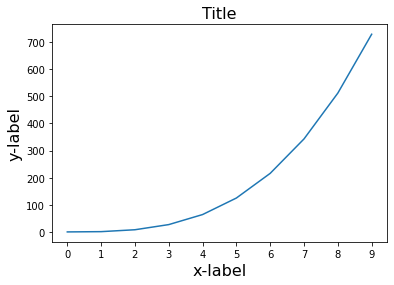

In [18]:
# creating a figure and axes with constrained_layout
fig, ax = plt.subplots(constrained_layout=False)

draw_plot(ax, fontsize=16)


To prevent this, the location of axes needs to be adjusted. For subplots, this can be done by adjusting the subplot params (Move the edge of an axes to make room for tick labels.) However, specifying your figure with the `constrained_layout=True` kwarg will do the adjusting automatically.

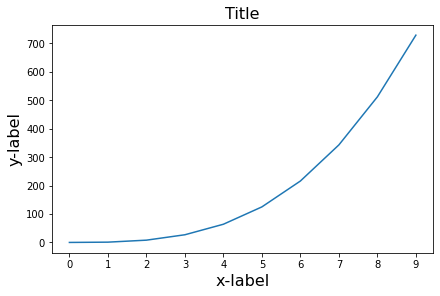

In [19]:
fig, ax = plt.subplots(constrained_layout=True)

draw_plot(ax, fontsize=16)


___

### Constrained_layout with multiple subplots
When you have multiple subplots, often you see labels of different axes overlapping each other.

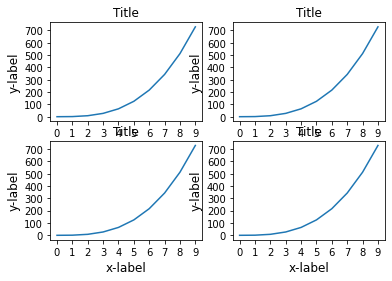

In [20]:
fig, axs = plt.subplots(2,2 ,constrained_layout=False)

for ax in axs.flat:
    draw_plot(ax)


Now we will automatically adjust the layout of the figure by using the `constrained_layout=True`.

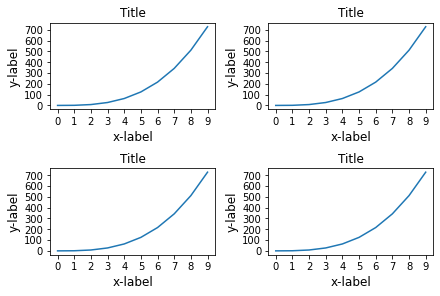

In [24]:
fig, axs = plt.subplots(2,2, constrained_layout=True)
for ax in axs.flat:
    draw_plot(ax)
    
# This will adjust the all the artist element in the given figsize.

### Colorbars
if you create a colorbar with `Figure.colorbar`, you need to make room for it. constrained_layout does this automatically. 

Note that if you specify `use_gridspec=True`. it will be igonered because this option is made for improving the layout via `tight_layout`.

`Note:`\
For the pcolormesh kwargs (pc_kwargs) we use a dictionary. Below we will assign one colorbar to a number of axes each containing a ScalarMappable; specifying the norm and colormap ensures the colorbar is accurate for all the axes.

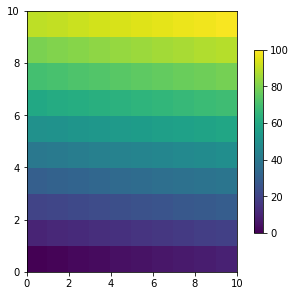

In [40]:
# first of all we will create 2d array
arr = np.arange(100).reshape((10,10))

# Now we will create a mcolors.Normalize() instance
norm = mcolors.Normalize(vmin=0., vmax=100.)
#  linearly normalizes data into the [0.0, 1.0] interval.

# defining the pcolormesh keyward argument
pc_kwargs = dict(rasterized=True, cmap='viridis', norm=norm)

# creating a figure and axes
fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)

# now we will create a pcolormesh instance
im = ax.pcolormesh(arr, **pc_kwargs)
# it will Create a pseudocolor plot with a non-regular rectangular grid.

# now we will use the fig.colorbar to put the colorbar
fig.colorbar(im, ax=ax, shrink=0.7)
# this will create a small recangular colorbar
# shrink will adjust the size of the colorbar 

**Multiple pcolormesh in single figure**

if you specify a list of axes (or other iterable container) to the ax argument of colorbar, constrained_layout will take space from the specified axes.

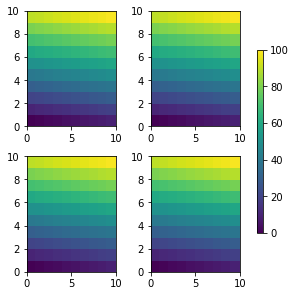

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(4, 4), constrained_layout=True)

for ax in axs.flat:
    im = ax.pcolormesh(arr, **pc_kwargs)
    
fig.colorbar(im, ax=axs, shrink=0.7)


**Multiple pcolormesh with muliple colorbar**

if you specify a list of axes from inside a grid of axes, the colorbar will steal space appropriately, and leave a gap, but all subplots will still be the same size.

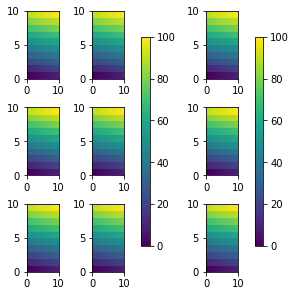

In [52]:
fig, axs = plt.subplots(3, 3 , figsize=(4, 4), constrained_layout=True)

for ax in axs.flat:
    im = ax.pcolormesh(arr, **pc_kwargs)
    
fig.colorbar(im, ax=axs[:, 1], shrink=0.8)
fig.colorbar(im, ax=axs[:, -1], shrink=0.8)

# we can span the rows and cols accroding to our need for color bar

### Suptitle
constrained_layout can also make room _suptitle_.

Text(0.5, 0.98, 'Big Suptitle')

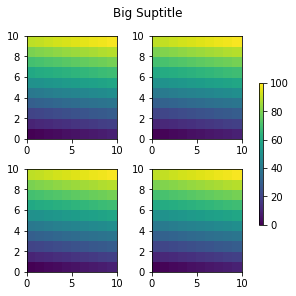

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(4,4), constrained_layout=True)

for ax in axs.flat:
    ax.pcolormesh(arr, **pc_kwargs)
    
fig.colorbar(im, ax=axs, shrink=0.6)
fig.suptitle("Big Suptitle")

### Legends

Legends can be placed outside of their parent axis . Constrained_layout is designed to handle this for Axes.legend(). However, constrained_layout does not handle legends being created via Figure.legends (yet)

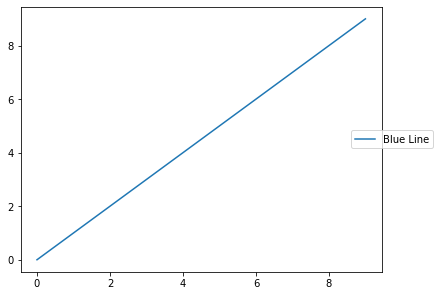

In [60]:
# first of all we will define a figure and axes by using the subplots
fig, ax = plt.subplots(constrained_layout=True)

# Now we will make a line
ax.plot(np.arange(10), label='Blue Line')

# Now we will place the legend
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
# bbox_to_anchor will define the relative postiion of the label to the axes.


How ever this will steal the space from a subplot layout.

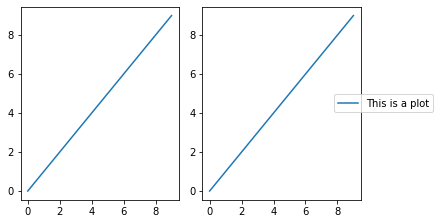

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
axs[0].plot(np.arange(10))
axs[1].plot(np.arange(10), label='This is a plot')
axs[1].legend(loc='center left', bbox_to_anchor=(0.8, 0.5))

In order for a legend or other artist to not steal space from the subplot layout, we can `leg.set_in_layout(False)`. 

This can mean the legend end up cropped, but c an be useful if the plot is subsequently called with fig.savefig('outname.png', bbox_inches='tight').

Note: However, that the legend's get_in_layout status will have to be toggled again to make the saved file work, and we must manually trigger a draw if we want constrained_layout to adjust the size of the axes before printing.

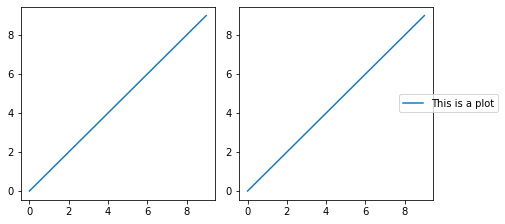

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
axs[0].plot(np.arange(10))
axs[1].plot(np.arange(10), label='This is a plot')
leg = axs[1].legend(loc='center left', bbox_to_anchor=(0.8, 0.5))

# Now we will use the .set_in_layout to prevent from stealing 
# the space from subplotes.
leg.set_in_layout(False)

# Now we need to trigger a darw on the canvas so that constrained_layout
# is executed once before we turn it off when printing.
fig.canvas.draw()
# by doing this all the atrist are drawn on the figure.

# Now we will off the constrained_layout off and we will one the
# .set_in_layout 

# Now we want the legends included in the bbox_inches='tight' calcs.
leg.set_in_layout(True)

# Now we don't want to change the layout at this point.
fig.set_constrained_layout(False)

fig.savefig("./tempfile.png", bbox_inches='tight', dpi=100)

A better way to get arount this awkwardness is to simply use the legend method provided by Figure.legend

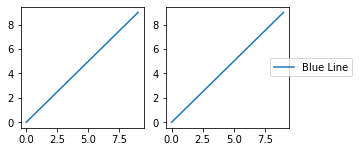

In [68]:
fig, axs = plt.subplots(1,2, figsize=(4, 2), constrained_layout=True)
arr = np.arange(10)
axs[0].plot(arr)
lines = axs[1].plot(arr, label='Blue Line')

labels = [i.get_label() for i in lines]

leg = fig.legend(lines, labels, loc='center left',
                bbox_to_anchor=(0.8, 0.5), 
                 bbox_transform=axs[1].transAxes)

# Note: here we have used the bbox_transform to set the 
# legends in with axs[1] relative coordinates or relative position
fig.savefig('./tempfile2.png', bbox_inches='tight', dpi=100)